In [1]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import os
import scipy
import time,datetime

In [2]:
DL_data = pd.read_csv("data/DL_data_final_non_standard.csv")
DL_data.drop(columns=['Unnamed: 0'],inplace = True)
path = os.getcwd()
if not os.path.exists(path+'\\image'):os.makedirs(path+'\\image')
if not os.path.exists(path+'\\image\\explor_en'):os.makedirs(path+'\\image\\explor_en')

In [3]:
# 出行目的
purpose_columns = ["Purpose_Work", "Purpose_School", "Purpose_Home", "Purpose_Shopping",
                   "Purpose_Entertainment",  "Purpose_Travel_or_Business_Trip", "Purpose_Take_Others"]
# 出行方式
mode_columns =["Mode_Walk", "Mode_Bus", "Mode_Subway", "Mode_Taxi", "Mode_Car", "Mode_Custom_Bus_or_Shared_Car"]

# 所在地区
region_columns = ['Region_ZhongShan','Region_XiGang','Region_ShaHeKou','Region_GanJingZi','Region_GaoXinYuan','Region_LvShun',
                  'Region_JinPu','Region_PuLanDian','Region_WaFangDian','Region_ZhuangHe','Region_ChangHai']
# 休息日
dayoff_columns = ['Dayoff_Mon', 'Dayoff_Tue', 'Dayoff_Wed','Dayoff_Thur', 'Dayoff_Fri', 'Dayoff_Sat', 'Dayoff_Sun']
# 职业类别
career_columns = ['Career_Woker','Career_Farmer','Career_Administrative','Career_Primary','Career_Junior','Career_Unemployed','Career_Service','Career_Education',
                  'Career_Doctor','Career_Technical','Career_Individual','Career_Soldier','Career_Freelancer','Career_Retiree','Career_Housewife','Career_Others']
# 年龄分段
age_columns = ['Age_0_to_10', 'Age_10_to_20', 'Age_20_to_30', 'Age_30_to_35', 'Age_35_to_40', 'Age_40_to_50', 'Age_50_to_60', 'Age_60_to_70', 'Age_70+']
# 文化程度
education_columns = ['Junior_secondary_and_below','High_school','undergraduate','Master_degree_or_above']
# 收入水平
total_income_columns = ['Total_Income_0_to_5w','Total_Income_5w_to_10w','Total_Income_10w_to_20w','Total_Income_20w_to_50w','Total_Income_50w+']
# 住房面积
house_area_columns = ['House_area_0_to_50','House_area_50_to_70','House_area_70_to_90','House_area_90_to_120','House_area_120_to_150']
# 家庭成员数量
member_columns = ['1','2','3','4','5','6+']

# 所在地区
region_columns_sim = ['ZhongShan','XiGang','ShaHeKou','GanJingZi','GaoXinYuan','LvShun','JinPu','PuLanDian','WaFangDian','ZhuangHe','ChangHai']
# 休息日
dayoff_columns_sim = ['Mon', 'Tue', 'Wed','Thur', 'Fri', 'Sat', 'Sun']
# 职业类别
career_columns_sim = ['Woker','Farmer','Administrative','Primary','Junior','Unemployed','Service','Education',
                  'Doctor','Technical','Individual','Soldier','Freelancer','Retiree','Housewife','Others']

# 年龄分段
age_columns_sim = ['0-10', '10-20', '20-30', '30-35', '35-40', '40-50', '50-60', '60-70', '70+']
# 文化程度
education_columns_sim = ['Junior','HighSchool','Undergraduate','Master/Doctor']
# 收入水平
total_income_columns_sim = ['0-5','5-10','10-20','20-50','50+']
# 住房面积
house_area_columns_sim = ['0-50','50-70','70-90','90-120','120-150']
# 家庭成员数量
member_columns_sim = ['1','2','3','4','5','6+']

In [4]:
# 生成绘图用的颜色

def RGB_to_Hex(rgb):
    
    RGB = list(rgb)
    color = '#'
    for i in RGB:
        num = int(i)
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color

def generate_colors(N=12,colormap='terrain'):
    step = max(int(255/N),1)
    cmap = plt.get_cmap(colormap)
    hex_list = []
    for i in range(N):
        id = step*i 
        id = 255 if id>255 else id
        rgba_color = cmap(id)
        rgb = [int(d*255) for d in rgba_color[:3]]
        hex_list.append(RGB_to_Hex(rgb))
    return hex_list

def generate_colors2(N=12,colormap='Set3'):
    cmap = plt.get_cmap(colormap)
    hex_list = []
    for i in range(N):
        i = 255 if i>255 else i
        rgba_color = cmap(i)
        rgb = [int(d*255) for d in rgba_color[:3]]
        hex_list.append(RGB_to_Hex(rgb))
    return hex_list

In [5]:
def Share_Group(xx_columns, share_df,labels_sim,figsize=(12,8),isMode=True):

    # 确认 index
    mode_columns = ["Mode_Walk", "Mode_Bus", "Mode_Subway", "Mode_Taxi", "Mode_Car", "Mode_Custom_Bus_or_Shared_Car"]
    purpose_columns = ["Purpose_Work", "Purpose_School", "Purpose_Home", "Purpose_Shopping",
                   "Purpose_Entertainment",  "Purpose_Travel_or_Business_Trip", "Purpose_Take_Others"]
    
    if isMode == True:
        share_df.index = mode_columns
        y_label = 'Travel Modes Share'

    else:
        share_df.index = purpose_columns
        y_label = 'Travel Purposes Share'
    # columns
    share_df.columns = xx_columns
    
    # 各标签占比
    results=dict.fromkeys(xx_columns)
    for i in range(len(xx_columns)):
        results[xx_columns[i]]= share_df[xx_columns[i]] / share_df[xx_columns[i]].sum()


    # 英文标签/图例
#     labels = list(results.keys()) 
    labels = labels_sim
    group_name=share_df.index


    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_ylim(0, np.sum(data, axis=1).max())
    category_colors = generate_colors2(7,"Set3")

    
    for i, (colname, color) in enumerate(zip(group_name, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.bar(labels, widths, bottom=starts, width=0.5,label=colname,color=color)
    ax.legend()
    
    plt.yticks(np.linspace(0,1,11),family='Times New Roman',fontsize=14)
    plt.ylabel(y_label,fontsize=18,family='Times New Roman')

# 1 Mode

In [6]:
travel_mode = pd.get_dummies(DL_data['MainTransport']).astype('int') 
travel_mode.columns = mode_columns

freq_mode = pd.DataFrame(columns=['Mode','Frequency','Percentage'],index=range(len(mode_columns)))
freq_mode["Mode"] = mode_columns
freq_mode["Frequency"] = list(travel_mode.sum())
freq_mode["Percentage"]= list(travel_mode.sum()/DL_data['MainTransport'].count())
freq_mode

,Mode,Frequency,Percentage
0,Mode_Walk,22943,0.321641
1,Mode_Bus,12196,0.170978
2,Mode_Subway,4390,0.061544
3,Mode_Taxi,2284,0.032020
4,Mode_Car,28582,0.400695
5,Mode_Custom_Bus_or_Shared_Car,936,0.013122


## 1.1 Region

,Region_ZhongShan,Region_XiGang,Region_ShaHeKou,Region_GanJingZi,Region_GaoXinYuan,Region_LvShun,Region_JinPu,Region_PuLanDian,Region_WaFangDian,Region_ZhuangHe,Region_ChangHai
Mode_Walk,1535,1057,2677,6330,2029,695,4914,828,1488,1046,344
Mode_Bus,1582,579,1594,4072,1282,155,1709,135,512,534,42
Mode_Subway,209,140,341,1210,301,105,1186,268,251,344,35
Mode_Taxi,166,137,175,680,133,58,584,58,119,155,19
Mode_Car,1486,1232,2205,8428,3117,906,6680,927,1816,1643,142
Mode_Custom_Bus_or_Shared_Car,16,19,43,253,86,30,337,51,51,48,2


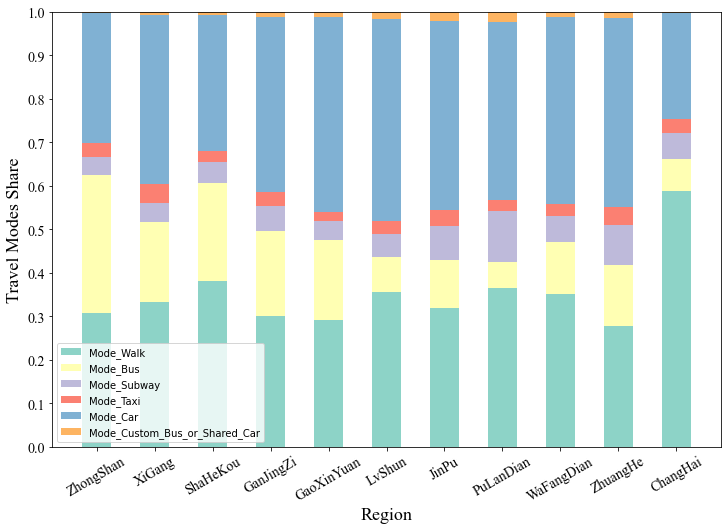

In [7]:
freq_mode_region = pd.DataFrame(columns=region_columns,index=list(mode_columns))
for r in range(len(region_columns)):
    for m in range(len(mode_columns)):
        freq_mode_region[region_columns[r]][m]=DL_data.loc[((DL_data[region_columns[r]]==1) & (DL_data['MainTransport']==m))].MainTransport.count()

Share_Group(region_columns, freq_mode_region,region_columns_sim,figsize=(12,8),isMode=True)
plt.xlabel('Region',fontsize=18,family='Times New Roman')
plt.xticks(rotation=30,horizontalalignment='center',family='Times New Roman',size = 14)

plt.savefig('image\\explor_en\\freq_mode_region.png',bbox_inches='tight',dpi=300)
freq_mode_region

## 1.2 Dayoff

,Dayoff_Mon,Dayoff_Tue,Dayoff_Wed,Dayoff_Thur,Dayoff_Fri,Dayoff_Sat,Dayoff_Sun
Mode_Walk,5300,5399,5294,5271,5256,16263,17121
Mode_Bus,2493,2518,2506,2429,2396,7866,8677
Mode_Subway,292,311,303,290,283,2827,3280
Mode_Taxi,393,396,398,372,375,1481,1631
Mode_Car,1433,1490,1441,1376,1293,19312,21592
Mode_Custom_Bus_or_Shared_Car,68,79,61,67,56,580,709


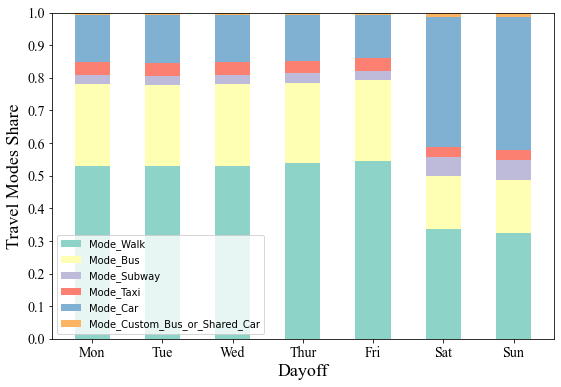

In [8]:
freq_mode_dayoff = pd.DataFrame(columns=dayoff_columns,index=list(mode_columns))
for r in range(len(dayoff_columns)):
    for m in range(len(mode_columns)):
        freq_mode_dayoff[dayoff_columns[r]][m]=DL_data.loc[((DL_data[dayoff_columns[r]]==1) & (DL_data['MainTransport']==m))].MainTransport.count()

Share_Group(dayoff_columns, freq_mode_dayoff,dayoff_columns_sim,figsize=(9,6),isMode=True)
plt.xlabel('Dayoff',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)

plt.legend(loc='lower left')
plt.savefig('image\\explor_en\\freq_mode_dayoff.png',bbox_inches='tight',dpi=300)
freq_mode_dayoff

## 1.3 Career

,Career_Woker,Career_Farmer,Career_Administrative,Career_Primary,Career_Junior,Career_Unemployed,Career_Service,Career_Education,Career_Doctor,Career_Technical,Career_Individual,Career_Soldier,Career_Freelancer,Career_Retiree,Career_Housewife,Career_Others
Mode_Walk,1391,213,768,3714,1679,816,1583,588,259,698,1095,112,1020,5134,1552,2321
Mode_Bus,1311,102,546,346,767,306,1584,358,224,866,508,30,663,2832,309,1444
Mode_Subway,1061,90,292,219,205,54,380,152,69,629,240,39,173,238,66,483
Mode_Taxi,162,18,124,89,226,99,212,75,66,195,157,22,179,286,133,241
Mode_Car,2941,219,2849,1790,1225,245,2222,1370,914,4336,3240,609,2211,858,448,3105
Mode_Custom_Bus_or_Shared_Car,101,33,44,106,256,18,59,23,5,67,45,5,43,63,13,55


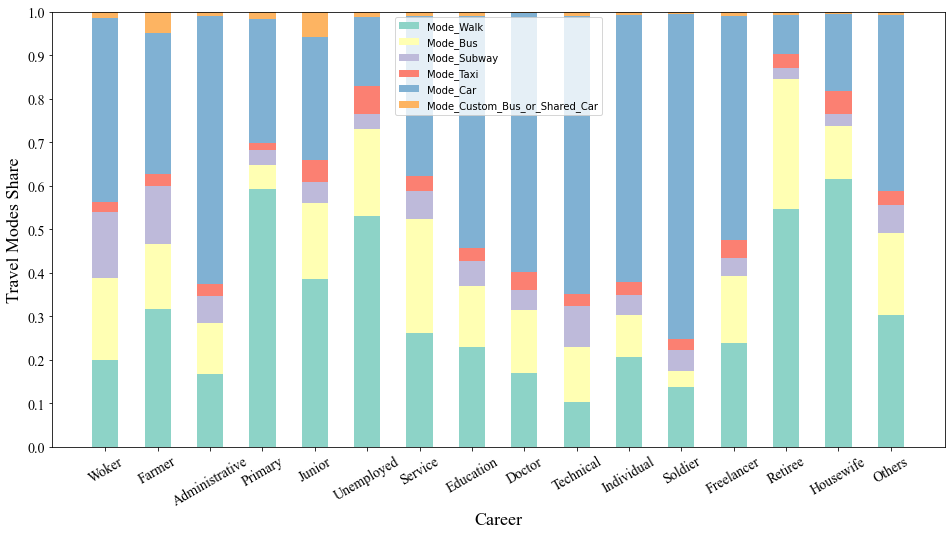

In [9]:
freq_mode_career = pd.DataFrame(columns=career_columns,index=list(mode_columns))
for r in range(len(career_columns)):
    for m in range(len(mode_columns)):
        freq_mode_career[career_columns[r]][m]=DL_data.loc[((DL_data[career_columns[r]]==1) & (DL_data['MainTransport']==m))].MainTransport.count()
        
Share_Group(career_columns, freq_mode_career,career_columns_sim,figsize=(16,8),isMode=True)
plt.xlabel('Career',fontsize=18,family='Times New Roman')
plt.xticks(rotation=30,horizontalalignment='center',family='Times New Roman',size = 14)

plt.savefig('image\\explor_en\\freq_mode_career.png',bbox_inches='tight',dpi=300)
freq_mode_career

## 1.4 Age

,Age_0_to_10,Age_10_to_20,Age_20_to_30,Age_30_to_35,Age_35_to_40,Age_40_to_50,Age_50_to_60,Age_60_to_70,Age_70+
Mode_Walk,2872,2671,1284,2131,2780,4265,2510,3257,1173
Mode_Bus,287,880,1282,1483,1744,2579,1447,1850,644
Mode_Subway,168,273,521,656,778,1149,602,189,54
Mode_Taxi,75,265,403,356,355,408,201,181,40
Mode_Car,1443,1637,2434,4959,5896,8948,2544,629,92
Mode_Custom_Bus_or_Shared_Car,86,290,97,89,83,149,90,41,11


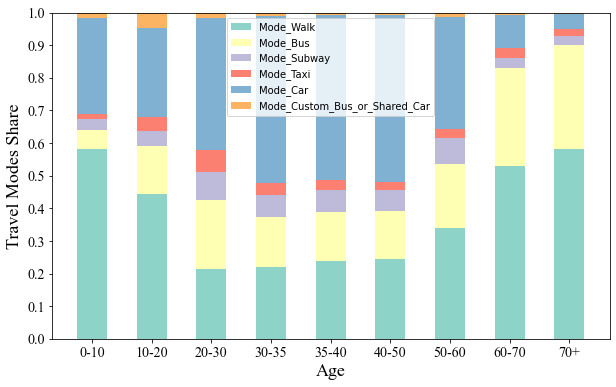

In [10]:
freq_mode_age = pd.crosstab(index=DL_data['MainTransport'], columns=DL_data['Age'])
Share_Group(age_columns, freq_mode_age,age_columns_sim,figsize=(10,6),isMode=True)
plt.xlabel('Age',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.savefig('image\\explor_en\\freq_mode_age.png',bbox_inches='tight',dpi=300)
freq_mode_age

## 1.5 Education

,Junior_secondary_and_below,High_school,undergraduate,Master_degree_or_above
Mode_Walk,9514,5835,7244,350
Mode_Bus,3085,3685,5200,226
Mode_Subway,1057,1300,1919,114
Mode_Taxi,474,667,1084,59
Mode_Car,4583,5847,16573,1579
Mode_Custom_Bus_or_Shared_Car,350,317,259,10


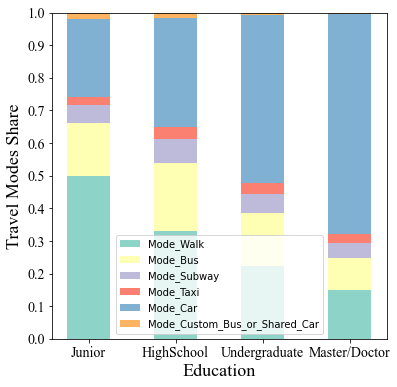

In [11]:
freq_mode_education = pd.crosstab(index=DL_data['MainTransport'], columns=DL_data['Education'])
Share_Group(education_columns, freq_mode_education,education_columns_sim,figsize=(6,6),isMode=True)
plt.xlabel('Education',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.savefig('image\\explor_en\\freq_mode_education.png',bbox_inches='tight',dpi=300)
freq_mode_education

## 1.6 Total in

,Total_Income_0_to_5w,Total_Income_5w_to_10w,Total_Income_10w_to_20w,Total_Income_20w_to_50w,Total_Income_50w+
Mode_Walk,9535,6931,4780,1490,207
Mode_Bus,5588,3366,2577,595,70
Mode_Subway,1963,1258,886,254,29
Mode_Taxi,948,801,334,172,29
Mode_Car,10141,11107,3198,3538,598
Mode_Custom_Bus_or_Shared_Car,384,291,187,64,10


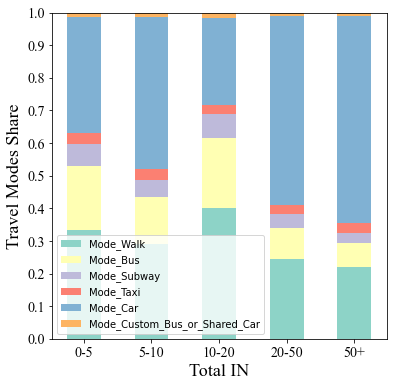

In [12]:
freq_mode_total_in = pd.crosstab(index=DL_data['MainTransport'], columns=DL_data['Total_IN'])
Share_Group(total_income_columns, freq_mode_total_in,total_income_columns_sim,figsize=(6,6),isMode=True)
plt.xlabel('Total IN',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.legend(loc='lower left')
plt.savefig('image\\explor_en\\freq_mode_total_in.png',bbox_inches='tight',dpi=300)
freq_mode_total_in

## 1.7 House Area

,House_area_0_to_50,House_area_50_to_70,House_area_70_to_90,House_area_90_to_120,House_area_120_to_150
Mode_Walk,2119,7210,8279,4282,1053
Mode_Bus,1300,4329,4221,1948,398
Mode_Subway,356,1414,1672,764,184
Mode_Taxi,163,655,884,480,102
Mode_Car,1004,5901,11119,7720,2838
Mode_Custom_Bus_or_Shared_Car,57,269,389,173,48


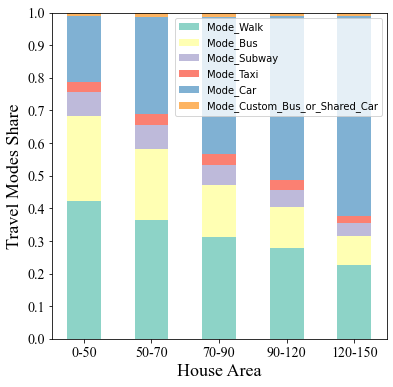

In [13]:
freq_mode_house_area = pd.crosstab(index=DL_data['MainTransport'], columns=DL_data['Area'])
Share_Group(house_area_columns, freq_mode_house_area,house_area_columns_sim,figsize=(6,6),isMode=True)
plt.xlabel('House Area',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.savefig('image\\explor_en\\freq_mode_house_area.png',bbox_inches='tight',dpi=300)
freq_mode_house_area

## 1.8 Members Count

,1,2,3,4,5,6+
Mode_Walk,1961,6306,10788,3576,277,35
Mode_Bus,1719,4133,5068,1192,76,8
Mode_Subway,429,1340,2079,522,20,0
Mode_Taxi,250,643,1117,264,8,2
Mode_Car,2242,6987,14957,4111,262,23
Mode_Custom_Bus_or_Shared_Car,88,209,489,134,14,2


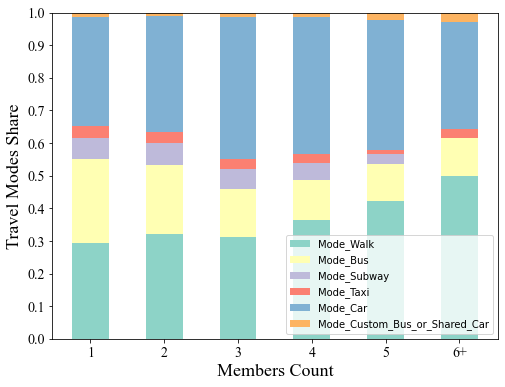

In [14]:
freq_mode_member_count = pd.crosstab(index=DL_data['MainTransport'], columns=DL_data['Members_Count'])
Share_Group(member_columns, freq_mode_member_count,member_columns_sim,figsize=(8,6),isMode=True)
plt.xlabel('Members Count',fontsize=18,family='Times New Roman')
plt.legend(loc='lower right')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.savefig('image\\explor_en\\freq_mode_member_count.png',bbox_inches='tight',dpi=300)
freq_mode_member_count

# 2 Purpose

In [15]:
travel_purposes = pd.get_dummies(DL_data['Travel_Purpose']).astype('int') 
travel_purposes.columns = purpose_columns

freq_purpose = pd.DataFrame(columns=['Purpose','Frequency'],index=range(len(purpose_columns)))
freq_purpose["Purpose"] = purpose_columns
freq_purpose["Frequency"] = list(travel_purposes.sum())
freq_purpose["Percentage"]= list(travel_purposes.sum()/DL_data['Travel_Purpose'].count())
freq_purpose

,Purpose,Frequency,Percentage
0,Purpose_Work,20556,0.288178
1,Purpose_School,5486,0.076909
2,Purpose_Home,32827,0.460207
3,Purpose_Shopping,4592,0.064376
4,Purpose_Entertainment,1938,0.027169
5,Purpose_Travel_or_Business_Trip,1134,0.015898
6,Purpose_Take_Others,4798,0.067264


## 2.1 Region

,Region_ZhongShan,Region_XiGang,Region_ShaHeKou,Region_GanJingZi,Region_GaoXinYuan,Region_LvShun,Region_JinPu,Region_PuLanDian,Region_WaFangDian,Region_ZhuangHe,Region_ChangHai
Purpose_Work,1414,1006,1963,6031,1902,644,4537,622,1240,1041,156
Purpose_School,313,202,389,1914,614,123,1213,146,316,191,65
Purpose_Home,2262,1473,3313,9758,3130,899,7061,1067,1863,1738,263
Purpose_Shopping,452,205,681,1204,376,132,857,186,238,246,15
Purpose_Entertainment,161,69,226,406,143,42,429,89,118,214,41
Purpose_Travel_or_Business_Trip,102,54,123,300,70,24,202,25,108,119,7
Purpose_Take_Others,290,155,340,1360,713,85,1111,132,354,221,37


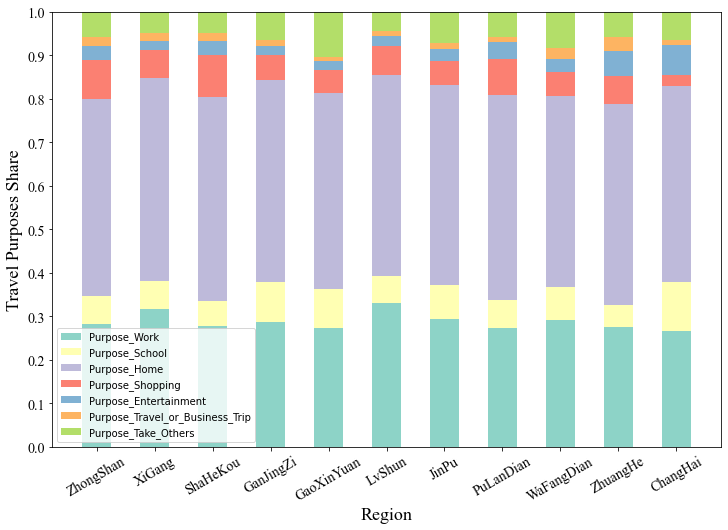

In [16]:
freq_purpose_region = pd.DataFrame(columns=region_columns,index=list(purpose_columns))
for r in range(len(region_columns)):
    for m in range(len(purpose_columns)):
        freq_purpose_region[region_columns[r]][m]=DL_data.loc[((DL_data[region_columns[r]]==1) & (DL_data['Travel_Purpose']==m))].Travel_Purpose.count()

Share_Group(region_columns, freq_purpose_region,region_columns_sim,figsize=(12,8),isMode=False)
plt.xlabel('Region',fontsize=18,family='Times New Roman')
plt.xticks(rotation=30,horizontalalignment='center',family='Times New Roman',size = 14)
plt.savefig('image\\explor_en\\freq_purpose_region.png',bbox_inches='tight',dpi=300)
freq_purpose_region

## 2.2 Dayoff

,Dayoff_Mon,Dayoff_Tue,Dayoff_Wed,Dayoff_Thur,Dayoff_Fri,Dayoff_Sat,Dayoff_Sun
Purpose_Work,608,744,664,582,509,13341,15117
Purpose_School,36,45,40,41,39,4767,5111
Purpose_Home,4684,4780,4696,4603,4543,22328,24455
Purpose_Shopping,2341,2319,2323,2310,2310,2877,2944
Purpose_Entertainment,785,783,773,779,777,1173,1258
Purpose_Travel_or_Business_Trip,536,525,531,524,525,712,751
Purpose_Take_Others,989,997,976,966,956,3131,3374


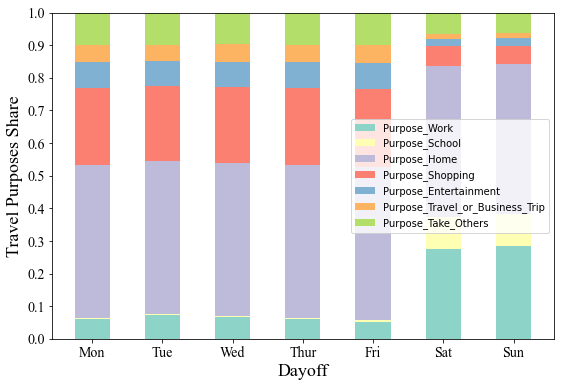

In [17]:
freq_purpose_dayoff = pd.DataFrame(columns=dayoff_columns,index=list(purpose_columns))
for r in range(len(dayoff_columns)):
    for m in range(len(purpose_columns)):
        freq_purpose_dayoff[dayoff_columns[r]][m]=DL_data.loc[((DL_data[dayoff_columns[r]]==1) & (DL_data['Travel_Purpose']==m))].Travel_Purpose.count()

Share_Group(dayoff_columns, freq_purpose_dayoff,dayoff_columns_sim,figsize=(9,6),isMode=False)
plt.xlabel('Dayoff',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
# plt.legend(loc='lower left')
plt.savefig('image\\explor_en\\freq_purpose_dayoff.png',bbox_inches='tight',dpi=300)
freq_purpose_dayoff

## 2.3 Career

,Career_Woker,Career_Farmer,Career_Administrative,Career_Primary,Career_Junior,Career_Unemployed,Career_Service,Career_Education,Career_Doctor,Career_Technical,Career_Individual,Career_Soldier,Career_Freelancer,Career_Retiree,Career_Housewife,Career_Others
Purpose_Work,3194,143,2130,80,50,61,2730,1157,696,3078,2190,377,1241,261,53,3115
Purpose_School,43,2,15,3007,2162,94,18,13,5,19,11,1,13,20,3,60
Purpose_Home,3244,315,2062,3066,2117,708,2693,1157,712,3060,2344,361,1931,4452,1142,3463
Purpose_Shopping,103,98,48,23,4,245,97,44,25,92,149,8,318,2642,472,224
Purpose_Entertainment,59,67,47,39,6,89,66,22,6,64,129,10,191,887,82,174
Purpose_Travel_or_Business_Trip,43,18,15,13,5,63,32,8,4,23,29,1,114,635,50,81
Purpose_Take_Others,281,32,306,36,14,278,404,165,89,455,433,59,481,514,719,532


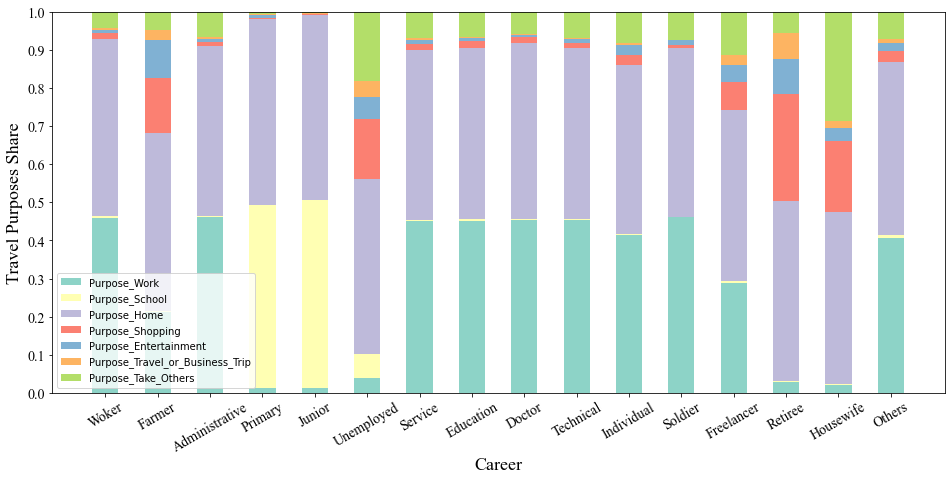

In [18]:
freq_purpose_career = pd.DataFrame(columns=career_columns,index=list(purpose_columns))
for r in range(len(career_columns)):
    for m in range(len(purpose_columns)):
        freq_purpose_career[career_columns[r]][m]=DL_data.loc[((DL_data[career_columns[r]]==1) & (DL_data['Travel_Purpose']==m))].Travel_Purpose.count()
        
Share_Group(career_columns, freq_purpose_career,career_columns_sim,figsize=(16,7),isMode=False)
plt.xlabel('Career',fontsize=18,family='Times New Roman')
plt.xticks(rotation=30,horizontalalignment='center',family='Times New Roman',size = 14)
plt.legend(loc='lower left')
plt.savefig('image\\explor_en\\freq_purpose_career.png',bbox_inches='tight',dpi=300)
freq_purpose_career

## 2.4 Age

,Age_0_to_10,Age_10_to_20,Age_20_to_30,Age_30_to_35,Age_35_to_40,Age_40_to_50,Age_50_to_60,Age_60_to_70,Age_70+
Purpose_Work,49,105,2582,3930,4460,6946,2156,279,49
Purpose_School,2340,2932,68,32,29,54,16,10,5
Purpose_Home,2408,2931,2819,4346,5116,7886,3457,2903,961
Purpose_Shopping,35,9,226,261,347,580,919,1633,582
Purpose_Entertainment,44,14,151,152,124,309,354,569,221
Purpose_Travel_or_Business_Trip,19,10,51,97,63,152,240,366,136
Purpose_Take_Others,36,15,124,856,1497,1571,252,387,60


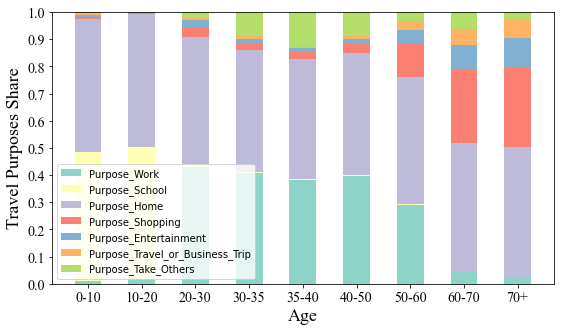

In [19]:
freq_purpose_age = pd.crosstab(index=DL_data['Travel_Purpose'], columns=DL_data['Age'])
Share_Group(age_columns, freq_purpose_age,age_columns_sim,figsize=(9,5),isMode=False)
plt.xlabel('Age',fontsize=18,family='Times New Roman')
plt.legend(loc='lower center')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.legend(loc='lower left')
plt.savefig('image\\explor_en\\freq_purpose_age.png',bbox_inches='tight',dpi=300)
freq_purpose_age

## 2.5 Education

,Junior_secondary_and_below,High_school,undergraduate,Master_degree_or_above
Purpose_Work,2074,4610,12884,988
Purpose_School,4416,904,147,19
Purpose_Home,9114,8162,14526,1025
Purpose_Shopping,1665,1714,1162,51
Purpose_Entertainment,732,616,548,42
Purpose_Travel_or_Business_Trip,437,387,293,17
Purpose_Take_Others,625,1258,2719,196


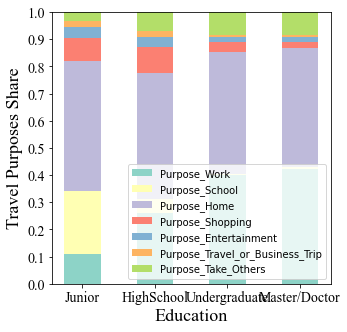

In [20]:
freq_purpose_education = pd.crosstab(index=DL_data['Travel_Purpose'], columns=DL_data['Education'])
Share_Group(education_columns, freq_purpose_education,education_columns_sim,figsize=(5,5),isMode=False)
plt.xlabel('Education',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.savefig('image\\explor_en\\freq_purpose_education.png',bbox_inches='tight',dpi=300)
plt.legend(loc='lower right')
freq_purpose_education

## 2.6 Total in

,Total_Income_0_to_5w,Total_Income_5w_to_10w,Total_Income_10w_to_20w,Total_Income_20w_to_50w,Total_Income_50w+
Purpose_Work,8245,7137,3072,1844,258
Purpose_School,2057,2102,650,580,97
Purpose_Home,13239,10813,5609,2742,424
Purpose_Shopping,2024,1112,1199,226,31
Purpose_Entertainment,781,474,533,118,32
Purpose_Travel_or_Business_Trip,498,253,316,58,9
Purpose_Take_Others,1715,1863,583,545,92


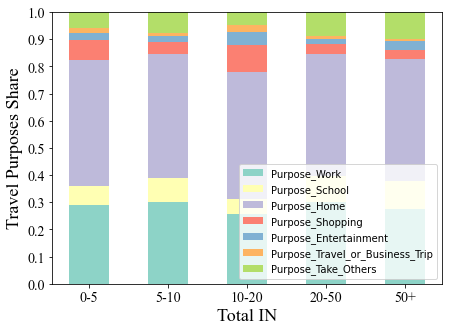

In [21]:
freq_purpose_total_in = pd.crosstab(index=DL_data['Travel_Purpose'], columns=DL_data['Total_IN'])
Share_Group(total_income_columns, freq_purpose_total_in,total_income_columns_sim,figsize=(7,5),isMode=False)
plt.xlabel('Total IN',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.legend(loc='lower right')
plt.savefig('image\\explor_en\\freq_purpose_total_in.png',bbox_inches='tight',dpi=300)
freq_purpose_total_in

## 2.7 House Area

,House_area_0_to_50,House_area_50_to_70,House_area_70_to_90,House_area_90_to_120,House_area_120_to_150
Purpose_Work,1408,5528,7768,4539,1313
Purpose_School,256,1311,2170,1321,428
Purpose_Home,2358,9173,12229,6997,2070
Purpose_Shopping,477,1672,1495,742,206
Purpose_Entertainment,180,644,660,335,119
Purpose_Travel_or_Business_Trip,131,366,387,185,65
Purpose_Take_Others,189,1084,1855,1248,422


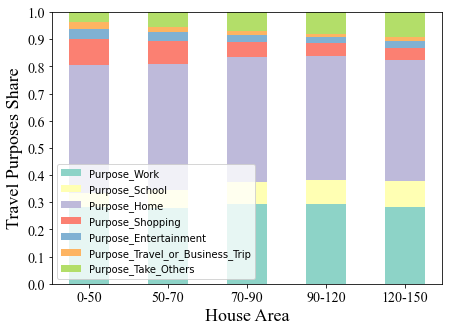

In [22]:
freq_purpose_house_area = pd.crosstab(index=DL_data['Travel_Purpose'], columns=DL_data['Area'])
Share_Group(house_area_columns, freq_purpose_house_area,house_area_columns_sim,figsize=(7,5),isMode=False)
plt.xlabel('House Area',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.legend(loc='lower left')
plt.savefig('image\\explor_en\\freq_purpose_house_area.png',bbox_inches='tight',dpi=300)
freq_purpose_house_area

## 2.8 Members Count

,1,2,3,4,5,6+
Purpose_Work,2446,5993,9617,2327,160,13
Purpose_School,31,329,3829,1236,56,5
Purpose_Home,3161,9216,15629,4482,307,32
Purpose_Shopping,586,2113,1419,441,30,3
Purpose_Entertainment,273,863,604,184,13,1
Purpose_Travel_or_Business_Trip,136,557,346,85,10,0
Purpose_Take_Others,56,547,3054,1044,81,16


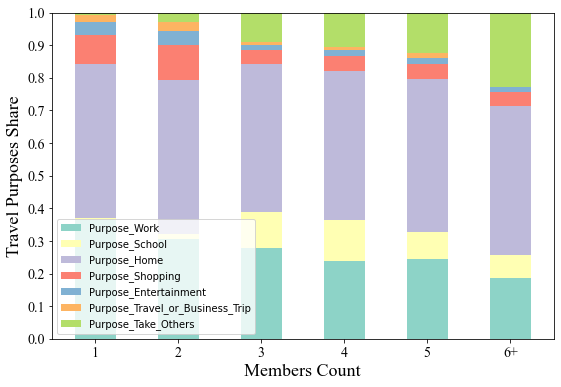

In [23]:
freq_purpose_member_count = pd.crosstab(index=DL_data['Travel_Purpose'], columns=DL_data['Members_Count'])
Share_Group(member_columns, freq_purpose_member_count,member_columns_sim,figsize=(9,6),isMode=False)
plt.xlabel('Members Count',fontsize=18,family='Times New Roman')
plt.xticks(rotation=0,horizontalalignment='center',family='Times New Roman',size = 14)
plt.legend(loc='lower left')
plt.savefig('image\\explor_en\\freq_purpose_member_count.png',bbox_inches='tight',dpi=300)
freq_purpose_member_count